In [10]:
import os
import sys
sys.path.append("/home/rohit/PhD_Work/GM_my_version/Graph_matching/")
from sklearn.cluster import KMeans
import networkx as nx
import numpy as np
from graph_generation.load_graphs_and_create_metadata import dataset_metadata
from graph_matching_tools.metrics import matching
import matplotlib.pyplot as plt
import scipy.io as sio

In [11]:
path_to_graph_folder = '/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/simu_graph/simu_test_single_noise/'
path_to_dummy_graph_folder = '/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/simu_graph/simu_with_dummy/'

In [13]:
def get_permutation_matrix_from_dictionary(matching, g_sizes):
    """
    Create the full permutation matrix from the matching result
    :param matching: the matching result for each graph (nodes number, assignment)
    :param g_sizes: the list of the size of the different graph
    :return: the full permutation matrix
    """
    f_size = int(np.sum(g_sizes))
    res = np.zeros((f_size, f_size))

    idx1 = 0
    for i_g1 in range(len(g_sizes)):
        idx2 = 0
        for i_g2 in range(len(g_sizes)):
            match = matching["{},{}".format(i_g1, i_g2)]
            for k in match:
                res[idx1 + int(k), idx2 + match[k]] = 1
            idx2 += g_sizes[i_g2]
        idx1 += g_sizes[i_g1]
        
    np.fill_diagonal(res,1)
    return res

In [16]:
trials = np.sort(os.listdir(path_to_graph_folder))


scores = {100:[],400:[],700:[],1000:[],1300:[]}
prec_scores = {100:[],400:[],700:[],1000:[],1300:[]}
rec_scores = {100:[],400:[],700:[],1000:[],1300:[]}

for trial in trials:
    print('trial: ', trial)
    
    all_files = os.listdir(path_to_graph_folder+trial)
    
    for folder in all_files:
        
        if os.path.isdir(path_to_graph_folder+trial+'/'+ folder):
            
            print('Noise folder: ',folder)
            
            path_to_graphs = path_to_graph_folder + '/' + trial + '/' + folder+'/graphs/'
            path_to_dummy_graphs = path_to_dummy_graph_folder + '/' + trial +'/' + folder + '/0/graphs/'
            path_to_groundtruth_ref = path_to_graph_folder + '/' + trial +'/' + folder + '/permutation_to_ref_graph.gpickle'
            path_to_groundtruth  = path_to_graph_folder + '/' + trial + '/' + folder + '/ground_truth.gpickle'
            
            if os.path.exists(path_to_graph_folder + '/' + trial + '/' + folder +'/X_mALS.mat'):
                              
            
                noise = folder.split(',')[0].split('_')[1]

                graph_meta = dataset_metadata(path_to_graphs, path_to_groundtruth_ref)
                ground_truth =  nx.read_gpickle(path_to_groundtruth)   
                res = get_permutation_matrix_from_dictionary(ground_truth, graph_meta.sizes)


                all_dummy_graphs = [nx.read_gpickle(path_to_dummy_graphs+'/'+g) for g in np.sort(os.listdir(path_to_dummy_graphs))]
                X_msync = sio.loadmat(path_to_graph_folder + '/' + trial + '/' + folder +'/X_mALS.mat')['X']            
                dummy_mask = [list(nx.get_node_attributes(graph,'is_dummy').values()) for graph in all_dummy_graphs]
                dummy_mask = sum(dummy_mask,[])
                dummy_indexes = [i for i in range(len(dummy_mask)) if dummy_mask[i]==True]            
                X_msync = np.delete(X_msync,dummy_indexes,0) # delete the dummy rows
                X_msync = np.delete(X_msync,dummy_indexes,1) # delete the dummy columns


                print('res shape: ',res.shape)
                print('X shape: ',X_msync.shape)

    #             X_init_0 = {}            
    #             X_init_0['X'] = np.zeros(X_msync.shape)

                #sio.savemat(path_to_dummy_graph_folder + '/' + trial + '/' + '/' + folder + '/0/X_init_0.mat',X_init_0)

                f1, prec, rec = matching.compute_f1score(X_msync,res)

                scores[int(noise)].append(f1)
                prec_scores[int(noise)].append(prec)
                rec_scores[int(noise)].append(rec)

trial:  0.0
Noise folder:  noise_100,outliers_varied
res shape:  (11434, 11434)
X shape:  (11434, 11434)
Noise folder:  noise_400,outliers_varied
res shape:  (11361, 11361)
X shape:  (11361, 11361)
Noise folder:  noise_700,outliers_varied
res shape:  (11279, 11279)
X shape:  (11279, 11279)
Noise folder:  noise_1300,outliers_varied
res shape:  (11432, 11432)
X shape:  (11432, 11432)
Noise folder:  noise_1000,outliers_varied
res shape:  (11318, 11318)
X shape:  (11318, 11318)
trial:  0.1
Noise folder:  noise_100,outliers_varied
res shape:  (11337, 11337)
X shape:  (11337, 11337)
Noise folder:  noise_400,outliers_varied
res shape:  (11406, 11406)
X shape:  (11406, 11406)
Noise folder:  noise_700,outliers_varied
res shape:  (11169, 11169)
X shape:  (11169, 11169)
Noise folder:  noise_1300,outliers_varied
res shape:  (11248, 11248)
X shape:  (11248, 11248)
Noise folder:  noise_1000,outliers_varied
res shape:  (11358, 11358)
X shape:  (11358, 11358)
trial:  0.2
Noise folder:  noise_100,outli

In [15]:
scores

{100: [], 400: [], 700: [], 1000: [], 1300: []}

In [17]:
# mALS_score

In [ ]:
nx.write_gpickle(scores,'mALS_score_init_0'+'.gpickle')
nx.write_gpickle(prec_scores,'mALS_score_init_0_prec_scores'+'.gpickle')
nx.write_gpickle(rec_scores,'mALS_score_init_0_rec_scores'+'.gpickle')

In [ ]:
scores

In [ ]:
prec_scores

In [ ]:
rec_scores

In [ ]:
# # CAO for two trials

# scores_selected = {100: [0.07575848754205779,
#   0.07814004910410795],
#  400: [0.3610063028572132, 0.3843341603488669],
#  1000: [0.6272369172851308,
#   0.6457353013735544],
#  1300: [0.7557834176288084,
#   0.7515356692225564]}

In [ ]:
# CAO for two trials prec scores

CAO_prec = {100: [0.06940255491618295,
  0.08012665815255075],
 400: [0.33249761899362795, 0.35625069398376574],
 1000: [0.6172584181139315,
  0.5847887618063963],
 1300: [0.7009452776744259,
  0.6994513562888791,
  0.7219446167567614]}

In [ ]:
CAO_rec = {100: [0.08223609723609723,
  0.09426311196571033],
 400: [0.394862188291054, 0.41722420711995695],
 1000: [0.7230928714145982,
  0.6913494371020555],
 1300: [0.8199302973202821,
  0.8120009329062546]}

In [7]:
def score_mean_std(scores):
    
    avg_scores = []
    std_scores = []

    for keys,values in scores.items():
        avg_scores.append(np.mean(values))
        std_scores.append(np.std(values))
        
    return np.array(avg_scores), np.array(std_scores)

In [4]:
# k_70 = nx.read_gpickle('kmeans_score_k_70.gpickle')
# k_90 = nx.read_gpickle('kmeans_score_k_90.gpickle')
# k_110 = nx.read_gpickle('kmeans_score_k_110.gpickle')
# kergm_scores = nx.read_gpickle('kerGM_scores.gpickle')
# m_Sync_scores = nx.read_gpickle('mSync_scores.gpickle')
mALS_score = nx.read_gpickle('mALS_score.gpickle')

In [9]:
# Precision Scores

# k_70_prec = nx.read_gpickle('kmeans_rec_score_k_70.gpickle')
# k_90_prec = nx.read_gpickle('kmeans_rec_score_k_90.gpickle')
# k_110_prec = nx.read_gpickle('kmeans_rec_score_k_110.gpickle')
# kergm_scores_prec = nx.read_gpickle('KerGM_rec_scores.gpickle')
# m_Sync_scores_prec = nx.read_gpickle('mSync_rec_scores.gpickle')
# m_Sync_kmeans_scores_prec = nx.read_gpickle('mSync_kmeans_rec_scores.gpickle')
# mALS_score_rec = nx.read_gpickle('mALS_rec_scores.gpickle')
# HiPPi_score_prec = nx.read_gpickle('Hippi_kmeans_rec_scores.gpickle')

In [8]:
# k_70_mean, k_70_std  = score_mean_std(k_70)
# k_90_mean, k_90_std  = score_mean_std(k_90)
# k_110_mean, k_110_std = score_mean_std(k_110)
# kergm_mean, kergm_std = score_mean_std(kergm_scores)
# msync_mean, msync_std = score_mean_std(m_Sync_scores)
mALS_mean, mALS_std = score_mean_std(mALS_score)
# msync_kmeans_mean, msync_kmeans_std = score_mean_std(scores)
# mALS_kmeans_mean, mALS_kmeans_std = score_mean_std(scores)

In [ ]:
# k_70_mean, k_70_std  = score_mean_std(k_70_prec)
# k_90_mean, k_90_std  = score_mean_std(k_90_prec)
# k_110_mean, k_110_std = score_mean_std(k_110_prec)
# kergm_mean, kergm_std = score_mean_std(kergm_scores_prec)
# msync_mean, msync_std = score_mean_std(m_Sync_scores_prec)
# mALS_mean, mALS_std = score_mean_std(mALS_score_prec)
# msync_kmeans_mean, msync_kmeans_std = score_mean_std(m_Sync_kmeans_scores_prec)
# Hippi_mean, Hippi_std = score_mean_std(HiPPi_score_prec)

In [ ]:
CAO_mean, CAO_std = score_mean_std(CAO_rec)

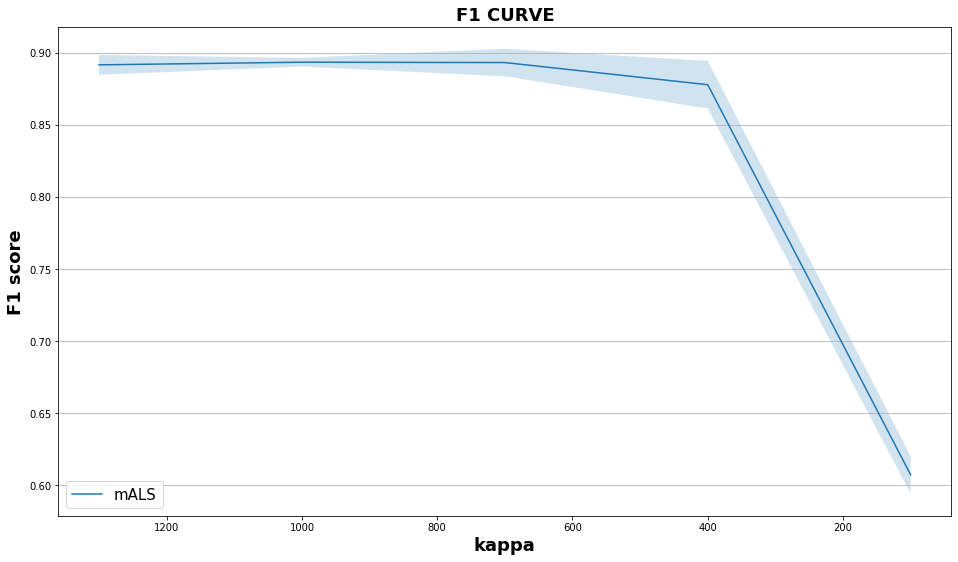

In [9]:
fig = plt.figure(figsize=(16, 9))

# plt.plot(list(k_70_prec.keys()), k_70_mean ,label = 'kmeans k = 70')
# plt.fill_between(list(k_70_prec.keys()), k_70_mean-k_70_std, k_70_mean + k_70_std, alpha=0.2)

# plt.plot(list(k_90_prec.keys()), k_90_mean ,label = 'kmeans k = 90')
# plt.fill_between(list(k_90_prec.keys()), k_90_mean - k_90_std, k_90_mean + k_90_std, alpha=0.2)

# plt.plot(list(k_110_prec.keys()), k_110_mean ,label = 'kmeans k = 110')
# plt.fill_between(list(k_110_prec.keys()), k_110_mean - k_110_std, k_110_mean + k_110_std, alpha=0.2)

# plt.plot(list(kergm_scores_prec.keys()), kergm_mean ,label = 'KerGM')
# plt.fill_between(list(kergm_scores_prec.keys()), kergm_mean - kergm_std, kergm_mean + kergm_std, alpha=0.2)

# plt.plot(list(m_Sync_scores_prec.keys()), msync_mean ,label = 'mSync')
# plt.fill_between(list(m_Sync_scores_prec.keys()), msync_mean - msync_std, msync_mean + msync_std, alpha=0.2)

plt.plot(list(mALS_score.keys()), mALS_mean ,label = 'mALS')
plt.fill_between(list(mALS_score.keys()), mALS_mean - mALS_std, mALS_mean + mALS_std, alpha=0.2)

# plt.plot(list(mALS_score_prec.keys()), msync_kmeans_mean ,label = 'mSync kmeans')
# plt.fill_between(list(m_Sync_scores_prec.keys()), msync_kmeans_mean - msync_kmeans_std, msync_kmeans_mean + msync_kmeans_std, alpha=0.2)

# plt.plot(list(CAO_prec.keys()), CAO_mean ,label = 'CAO')
# plt.fill_between(list(CAO_prec.keys()), CAO_mean - CAO_std, CAO_mean + CAO_std, alpha=0.2)

# plt.plot(list(HiPPi_score_prec.keys()), Hippi_mean ,label = 'HiPPi')
# plt.fill_between(list(HiPPi_score_prec.keys()), Hippi_mean - Hippi_std, Hippi_mean + Hippi_std, alpha=0.2)

# plt.plot(list(scores.keys()), mALS_kmeans_mean ,label = 'mALS_kmeans')
# plt.fill_between(list(scores.keys()), mALS_kmeans_mean - mALS_kmeans_std, mALS_kmeans_mean + mALS_kmeans_std, alpha=0.2)

plt.xlabel('kappa',fontweight="bold",fontsize=18)
plt.ylabel('F1 score',fontweight="bold",fontsize=18)
plt.legend(loc = 'lower left')
plt.title('F1 CURVE',fontweight="bold",fontsize=18)
plt.gca().yaxis.grid(True)
plt.gca().invert_xaxis()
plt.legend(loc=3, prop={'size': 15})
plt.show()
#fig.savefig('Scores Kmeans_Kergm_mSync.png')

In [ ]:
fig = plt.figure(figsize=(16, 9))
plt.plot(list(scores.keys()), list(scores.values()) ,label = 'mALS')
plt.xlabel('kappa',fontweight="bold",fontsize=18)
plt.ylabel('F1 score mALS',fontweight="bold",fontsize=18)
plt.legend(loc = 'lower left')
plt.title('F1 CURVE, pSelect = 50%',fontweight="bold",fontsize=18)
plt.gca().yaxis.grid(True)
plt.gca().invert_xaxis()
plt.legend(loc=3, prop={'size': 15})
plt.show()

In [ ]:
fig = plt.figure(figsize=(16, 9))
plt.plot(list(scores.keys()), list(prec_scores.values()) ,label = 'CAO-C')
plt.xlabel('kappa',fontweight="bold",fontsize=18)
plt.ylabel('Prec score',fontweight="bold",fontsize=18)
plt.legend(loc = 'lower left')
plt.title('Precision CURVE',fontweight="bold",fontsize=18)
plt.gca().yaxis.grid(True)
plt.gca().invert_xaxis()
plt.legend(loc=3, prop={'size': 15})
plt.show()

In [ ]:
fig = plt.figure(figsize=(16, 9))
plt.plot(list(scores.keys()), list(rec_scores.values()) ,label = 'CAO-C')
plt.xlabel('kappa',fontweight="bold",fontsize=18)
plt.ylabel('Rec score',fontweight="bold",fontsize=18)
plt.legend(loc = 'lower left')
plt.title('Recall CURVE',fontweight="bold",fontsize=18)
plt.gca().yaxis.grid(True)
plt.gca().invert_xaxis()
plt.legend(loc=3, prop={'size': 15})
plt.show()